In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
name_basics_df = pd.read_csv('data/imdb.name.basics.csv')
crew_df = pd.read_csv('data/imdb.title.crew.csv')
principal_df = pd.read_csv('data/imdb.title.principals.csv')
ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
Mojo_df = pd.read_csv('data/bom.movie_gross.csv')
tnum_df = pd.read_csv('data/tn.movie_budgets.csv')

In [92]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [93]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [94]:
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [95]:
principal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [96]:
imdb_df = title_basics_df.merge(ratings_df, on='tconst')
imdb_df = imdb_df.merge(crew_df, on='tconst')

Leaving out principals_df, as it introduces a lot of duplicate entries, if we need it later we can look at it, but for right now I don't think it has anything immediately necessary in it.

In [97]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   directors        73104 non-null  object 
 9   writers          63295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.2+ MB


6.5
count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64


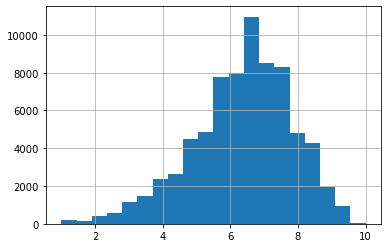

In [128]:
imdb_df['averagerating'].hist(bins=20)
print(imdb_df['averagerating'].median())
print(imdb_df['averagerating'].describe())

In [99]:
Mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [135]:
imdb_and_mojo_df = imdb_df.merge(Mojo_df, left_on=['primary_title', 'start_year'], right_on=['title', 'year'], how='left')

In [136]:
imdb_and_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   directors        73104 non-null  object 
 9   writers          63295 non-null  object 
 10  title            1847 non-null   object 
 11  studio           1845 non-null   object 
 12  domestic_gross   1837 non-null   float64
 13  foreign_gross    1269 non-null   object 
 14  year             1847 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 9.0+ MB


In [102]:
imdb_and_mojo_df['runtime_minutes'].median()
imdb_and_mojo_df['runtime_minutes'] = imdb_and_mojo_df['runtime_minutes'].fillna(imdb_and_mojo_df['runtime_minutes'].median())

2000000.0 Median Gross
count    3.027000e+03
mean     3.043218e+07
std      6.651784e+07
min      1.000000e+02
25%      1.445000e+05
50%      2.000000e+06
75%      3.210000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64


<AxesSubplot:>

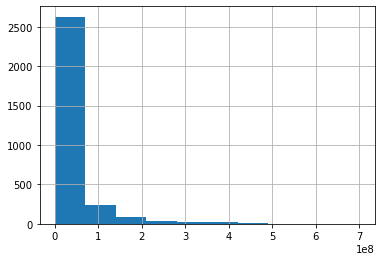

In [125]:
print(imdb_and_mojo_df['domestic_gross'].median(), "Median Gross") # Median and mean are fairly different thanks to very high outliers.
print(imdb_and_mojo_df['domestic_gross'].describe())
imdb_and_mojo_df['domestic_gross'].hist() # This would indicate it's better to replace NaN with median

In [126]:
imdb_and_mojo_df['domestic_gross'] = imdb_and_mojo_df['domestic_gross'].fillna(imdb_and_mojo_df['domestic_gross'].median())
imdb_and_mojo_df['foreign_gross'].replace(',','', inplace=True)
imdb_and_mojo_df['foreign_gross'] = pd.to_numeric(imdb_and_mojo_df['foreign_gross'], errors='ignore')

66517835.80895825


<AxesSubplot:>

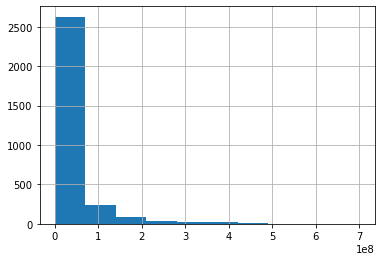

In [105]:
print(imdb_and_mojo_df['domestic_gross'].std())
imdb_and_mojo_df['domestic_gross'].hist()

In [127]:
director_df = imdb_and_mojo_df.groupby('directors').mean().reset_index()
director_foreign_gross = imdb_and_mojo_df.loc[imdb_and_mojo_df['foreign_gross'].notna()].groupby('directors').mean().reset_index()
director_foreign_gross.head()

,directors,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
0,nm0000095,2013.142857,99.285714,6.714286,112297.285714,18000000.0,4.634286e+07,2013.142857
1,nm0000108,2014.000000,119.333333,6.666667,184237.333333,56085000.0,1.749333e+08,2014.333333
2,nm0000110,2012.500000,110.000000,6.600000,399088.500000,115800000.0,1.766000e+08,2012.500000
3,nm0000123,2012.500000,109.500000,6.600000,162527.500000,59500000.0,5.600000e+07,2012.500000
4,nm0000127,2010.500000,109.000000,5.500000,68580.000000,26450000.0,3.260000e+07,2010.500000


In [111]:
directors_box_df = director_df.merge(name_basics_df, left_on='directors', right_on='nconst')
directors_foreign_box_df = director_foreign_gross.merge(name_basics_df, left_on='directors', right_on='nconst')

In [117]:
# directors_box_df.info()
living_directors_box = directors_box_df.loc[directors_box_df['death_year'].isna()].drop(columns=["death_year", "birth_year", 'year', 'start_year'])
living_foreign_box = directors_foreign_box_df.loc[directors_foreign_box_df['death_year'].isna()].drop(columns=["death_year", "birth_year", 'year', 'start_year'])

In [122]:
living_directors_box.sort_values('domestic_gross').tail(20)

,directors,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,nconst,primary_name,primary_profession,known_for_titles
958,nm0834902,97.000000,7.000000,3.058320e+05,2.414000e+08,5.171000e+08,nm0834902,Robert Stromberg,"visual_effects,director,producer","tt0499549,tt1587310,tt1014759,tt0311113"
69,nm0000881,157.666667,5.700000,2.563007e+05,2.426667e+08,7.017667e+08,nm0000881,Michael Bay,"producer,director,actor","tt2109248,tt1055369,tt0117500,tt0120591"
166,nm0005222,145.500000,7.300000,4.723625e+05,2.522500e+08,7.424000e+08,nm0005222,Sam Mendes,"producer,director,miscellaneous","tt0959337,tt1074638,tt0257044,tt0169547"
1596,nm2284484,113.500000,7.100000,2.814620e+05,2.662185e+08,2.639500e+08,nm2284484,Gareth Edwards,"visual_effects,director,writer","tt1470827,tt0831387,tt2527336,tt3748528"
900,nm0768959,104.000000,7.300000,2.918870e+05,2.685000e+08,4.757000e+08,nm0768959,Dan Scanlon,"writer,art_department,director","tt1217209,tt1437330,tt1453405,tt2096673"
356,nm0190859,91.000000,7.700000,7.100180e+05,2.741000e+08,4.491000e+08,nm0190859,Alfonso Cuarón,"writer,producer,director","tt6155172,tt1454468,tt0245574,tt0206634"
1766,nm3363032,117.333333,7.466667,2.696687e+05,2.753333e+08,2.373333e+08,nm3363032,Ryan Coogler,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658"
812,nm0634240,146.750000,8.425000,1.248687e+06,2.791750e+08,4.997750e+08,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506"
1436,nm1720541,124.000000,5.000000,2.117330e+05,3.005000e+08,3.980000e+08,nm1720541,David Slade,"producer,director,writer","tt1325004,tt0424136,tt0389722,tt9495224"
262,nm0083348,126.666667,7.166667,2.643317e+05,3.038000e+08,4.117333e+08,nm0083348,Brad Bird,"miscellaneous,writer,director","tt0129167,tt3606756,tt0317705,tt0382932"
